In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from utils.matrix_builder import create_ta_feature_matrix, create_feature_matrix

# Debug parameter
DEBUG = True

if DEBUG:
    print("Debug mode is ON. Detailed output will be printed.")

# Load Database
csv_hour_file = '../data/ta_metrics/final_price_ta_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# Define the Sliding Windows for this run
sliding_window = 10 # of days to train on (matrix rows)
lag_price_window = 3  # Window of the number of previous days as features (matrix columns)

training_sliding_window = sliding_window + 1  # +1 to include the next row as the test set

# Calculate number of sliding window models to train in the dataset
num_sliding_windows = len(df) - training_sliding_window
if DEBUG:
    print(f"Number of rows in the dataset: {len(df)}")
    print(f"Number of sliding windows to train: {num_sliding_windows}")

# Display the first few rows of the DataFrame
# print(f"Database:\n{df.head()}")

# Create Training and Test loop
# for i in range(1): # starts at 0, so we can use the first row as the test set
i = 2
# for i in range(num_sliding_windows):
    # Note: This is a sliding window approach, where each iteration uses the next row as the test set

# Ensure we do not exceed the DataFrame length
# if i + sliding_window >= len(df):
#     break  # Avoid index out of bounds

# We will create a window of 'sliding_window' rows for training and predict on the next row
sliding_window_set = df.iloc[i : i + training_sliding_window]
if DEBUG:
    print(f"Sliding window subset:\n{sliding_window_set}\n")

# Create feature matrix and target variable for training
X_train, y_train = create_ta_feature_matrix(sliding_window_set, lag_price_window)
if DEBUG:
    print(f"X_train:\n{X_train.head()}")
    print(f"y_train:\n{y_train.head()}")

# To train and test, we will use the last row of the sliding window set as the test set
# Split the sliding window matrix into the training set and the last row for prediction
X_train = X_train.iloc[:-1]  # All but the last row for training
y_train = y_train.iloc[:-1]  # All but the last value for training

X_to_predict = X_train.iloc[-1:]  # Last row of the sliding window set set as model input for prediction
y_to_predict = y_train.iloc[-1]  # Last value of the sliding window set set as target for prediction

if DEBUG:
    print(f"X_to_predict:\n{X_to_predict}")
    print(f"y_to_predict:\n{y_to_predict}")

# Fit the Lasso model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
# print(f"Model coefficients: {model.coef_}")
# print(f"Model intercept: {model.intercept_}")

# Predict the target variable using the last row of the sliding window set
y_predicted = model.predict(X_to_predict)
if DEBUG:
    print(f"y_predicted:\n{y_predicted[:5]}")

# Save the model prediction to a dataframe to a second DataFrame

# # Evaluate the models
# # check df vs prediction_df values
# print(f"Prediction DataFrame:\n{prediction_df.head()}")
# print(f"Test DataFrame:\n{test[['Datetime', 'Close']].head()}")
# print(f"Actual values:\n{test['Close'].values[:5]}\n")

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae}")
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")
# print("Evaluation metrics calculated.\n")

# # Print the results
# print(f"Test set predictions:\n{y_pred}")
# print(f"Actual values:\n{y_test.values}\n")


Debug mode is ON. Detailed output will be printed.
Number of rows in the dataset: 2260
Number of sliding windows to train: 2249
Sliding window subset:
              Datetime  MarginalES      SMA_3   SMA_5      SMA_7     SMA_14  \
2  2018-07-01 14:00:00       55.00  58.686667  60.760  61.751429  61.154286   
3  2018-07-02 14:00:00       64.97  59.286667  60.906  61.838571  61.690000   
4  2018-07-03 14:00:00       62.52  60.830000  60.710  61.612857  61.848571   
5  2018-07-04 14:00:00       62.50  63.330000  60.576  61.364286  61.872857   
6  2018-07-04 14:00:00       62.50  62.506667  61.498  61.221429  61.910714   
7  2018-07-05 14:00:00       62.01  62.336667  62.900  61.055714  61.947143   
8  2018-07-06 14:00:00       63.09  62.533333  62.524  61.798571  62.139286   
9  2018-07-07 14:00:00       61.21  62.103333  62.262  62.685714  62.218571   
10 2018-07-08 14:00:00       60.97  61.756667  61.956  62.114286  61.976429   
11 2018-07-09 14:00:00       64.95  62.376667  62.446  62.4

NameError: name 'test' is not defined

In [ ]:
# moved to 2_lasso.ipynb

Number of sliding windows to train: 2159
Overall Mean Squared Error: 361.0665053521604
Overall Mean Absolute Error: 10.262567144109463
Overall R^2 Score: 0.8982576306208708
Best Alpha value: 0.1


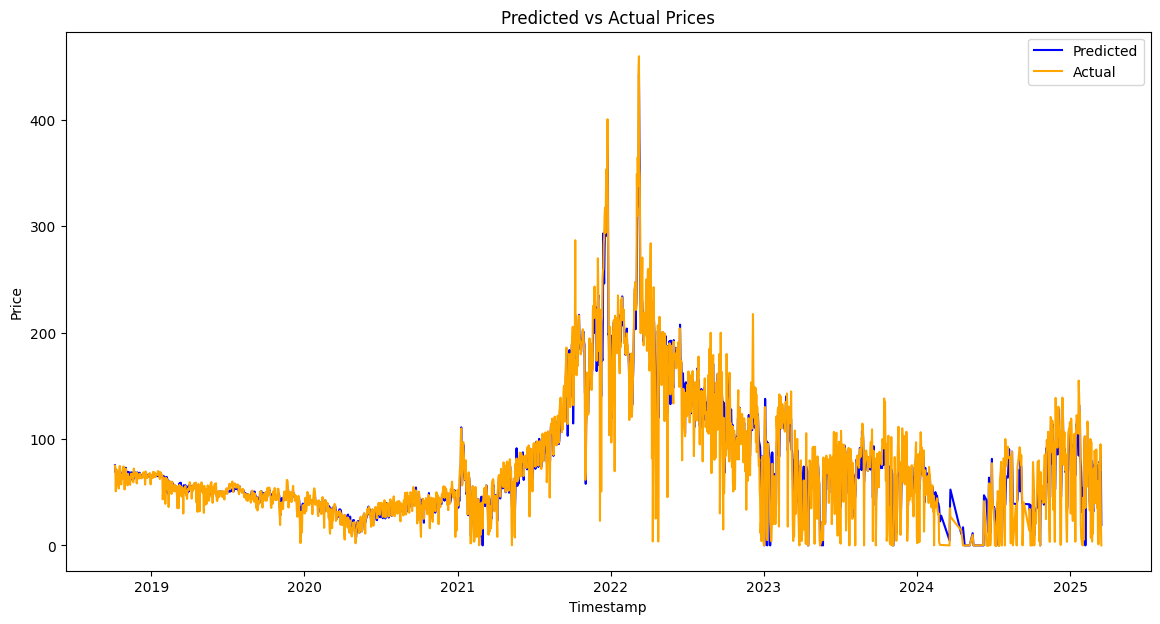

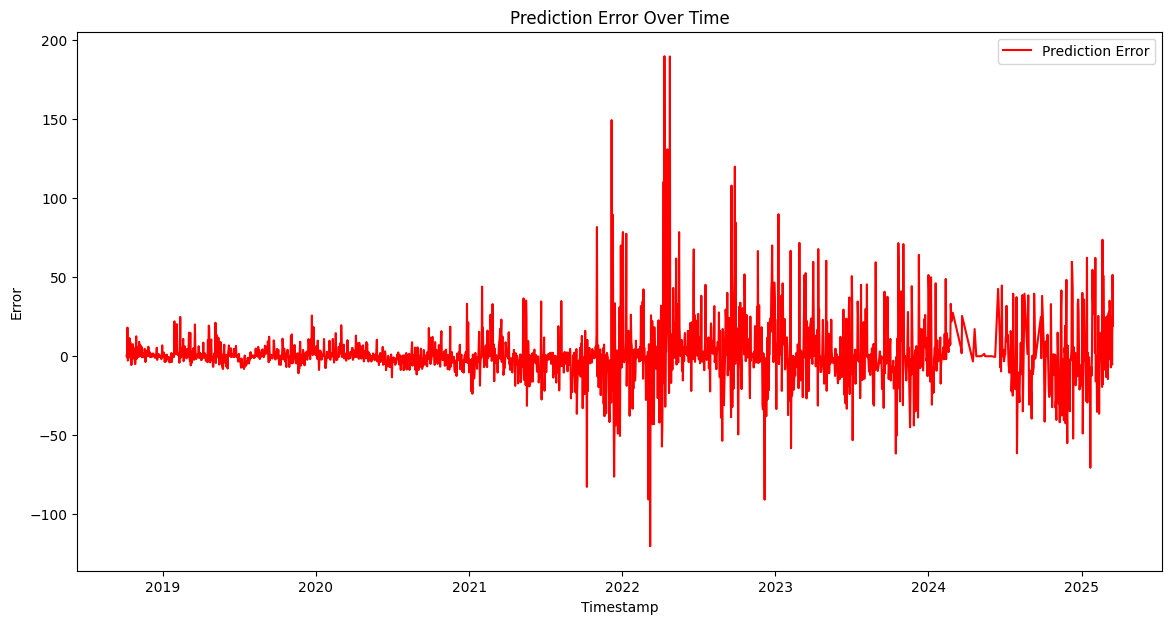

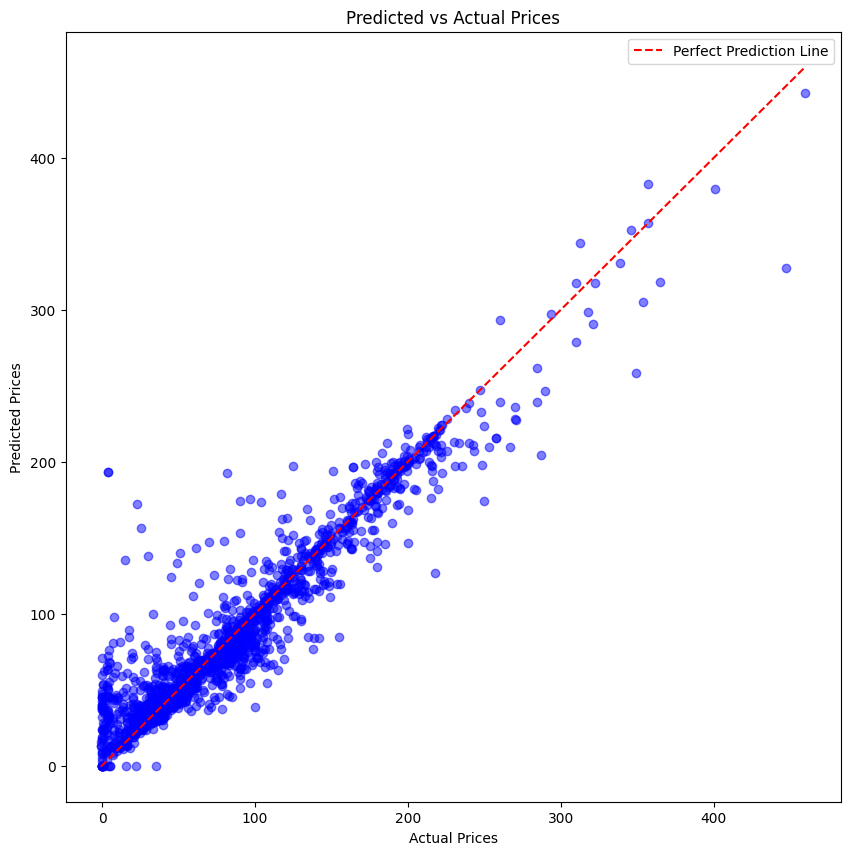

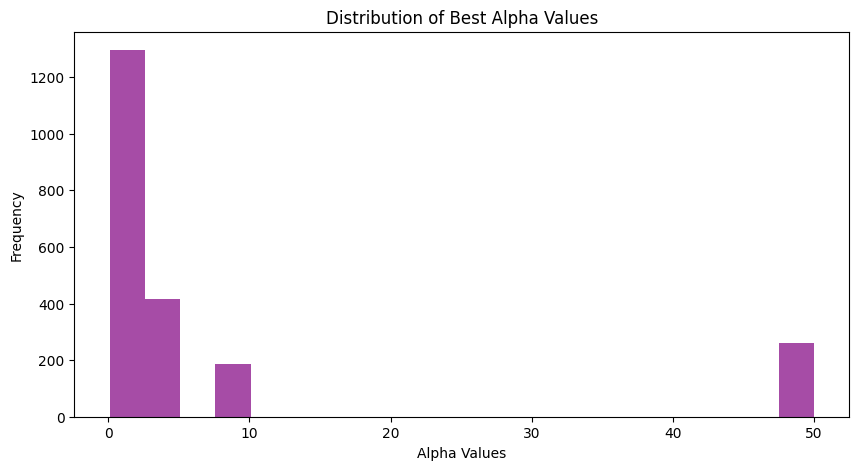

In [ ]:
# moved to 2_lasso.ipynb

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from utils.matrix_builder import create_ta_feature_matrix

# Load CSV
# csv_hour_file = '../data/ta_metrics/new_price_metrics_hour_14.csv'
csv_hour_file = '../data/ta_metrics/final_price_ta_metrics.csv'

df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# Decide price features window size for this run
lag_price_window = 3

# Select features (excluding 'Datetime')
feature_columns = df.columns[1:]
df = df[['Datetime'] + list(feature_columns)]

df['day_of_week'] = df['Datetime'].dt.dayofweek  # Monday=0
df['month'] = df['Datetime'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# compute number of sliding window models to train in the dataset

num_sliding_windows = len(df) - lag_price_window
print(f"Number of sliding windows to train: {num_sliding_windows}")

# Filter date range
train_start_date = '2018-12-25'
train_end_date = '2019-02-01'
train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# Create sliding window matrices
X, y = create_ta_feature_matrix(train_subset_df, lag_price_window)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# Train Lasso model (adjust alpha as needed)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
# Predict on test set
y_test_pred = lasso.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")


Test MSE: 10.8784
Test MAE: 2.3259
Test R2: 0.8701


/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.565e+00, tolerance: 2.006e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from utils.matrix_builder import create_ta_feature_matrix

# Load CSV
csv_hour_file = '/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/data/ta_metrics/new_price_metrics_hour_14.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# Decide window size for this run
window_size = 3

# Select features (excluding 'Datetime')
feature_columns = df.columns[1:]
df = df[['Datetime'] + list(feature_columns)]

df['day_of_week'] = df['Datetime'].dt.dayofweek  # Monday=0
df['month'] = df['Datetime'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# # order columns
# df = df[['Datetime', 'MarginalES', 'day_of_week', 'month', 'is_weekend'] + list(feature_columns)]

# scaler = StandardScaler()
# columns_to_scale = df.columns[window_size+2:]
# print(f"Columns to scale: {columns_to_scale.tolist()}")
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Filter date range
train_start_date = '2018-12-25'
# train_end_date = '2021-01-01'
train_end_date = '2019-02-01'
train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# Create sliding window matrices
X, y = create_ta_feature_matrix(train_subset_df, window_size)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# Train Lasso model (adjust alpha as needed)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
# Predict on test set
# y_test_pred = lasso.predict(X_test)

# Train Ridge model (adjust alpha as needed)
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)
# Predict on test set
y_test_pred = ridge.predict(X_test)


# Evaluate performance
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")

# Predict next value based on last test row
X_last = X_test.iloc[[-1]]
# y_pred_last = lasso.predict(X_last)[0]

y_pred_last = ridge.predict(X_last)[0]

y_actual_last = y_test.iloc[-1]

# Show prediction vs actual
print(f"\nLast test window input:\n{X_test.iloc[-1]}")
print(f"\nPredicted next price: {y_pred_last:.2f}")
print(f"Actual next price:    {y_actual_last:.2f}")
print(f"Prediction error:     {abs(y_pred_last - y_actual_last):.2f}")

Test MSE: 67.7147
Test MAE: 4.8843
Test R2: -0.7659

Last test window input:
price_t-3      54.950000
price_t-2      62.650000
price_t-1      63.650000
SMA_3          60.416667
SMA_5          58.104000
SMA_7          60.184286
SMA_10         62.373000
SMA_30         65.062000
SMA_50         65.005600
SMA_60         65.008000
SMA_100        65.049000
SMA_200        67.013250
EMA_12         61.989659
EMA_26         63.699080
ROC_12         -7.215743
ROC_50         -2.167230
RSI_5          54.798454
RSI_7          52.222300
RSI_14         49.898120
day_of_week     2.000000
month           1.000000
is_weekend      0.000000
Name: 34, dtype: float64

Predicted next price: 67.60
Actual next price:    60.10
Prediction error:     7.50


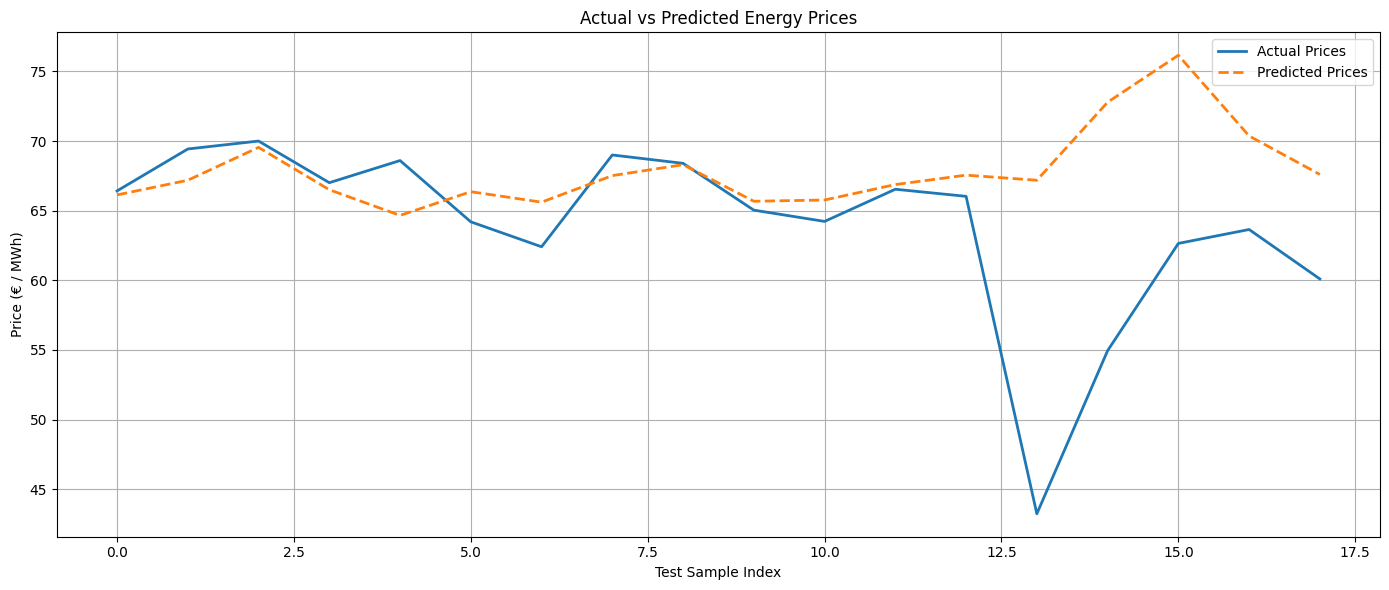

In [8]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Prices', linewidth=2)
plt.plot(y_test_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Energy Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Price (€ / MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

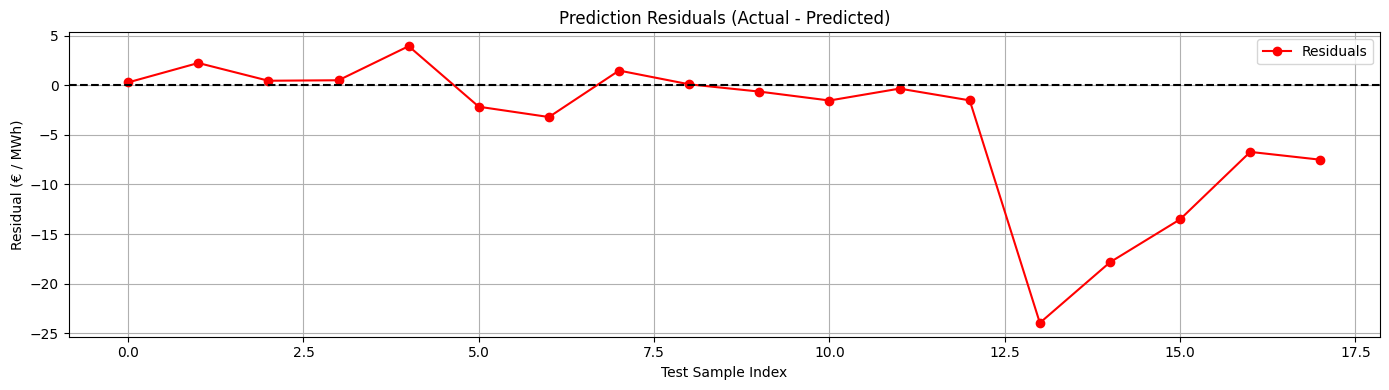

In [9]:
# Plot prediction errors (residuals)
plt.figure(figsize=(14, 4))
residuals = y_test.values - y_test_pred
plt.plot(residuals, color='red', marker='o', linestyle='-', label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Residuals (Actual - Predicted)")
plt.xlabel("Test Sample Index")
plt.ylabel("Residual (€ / MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

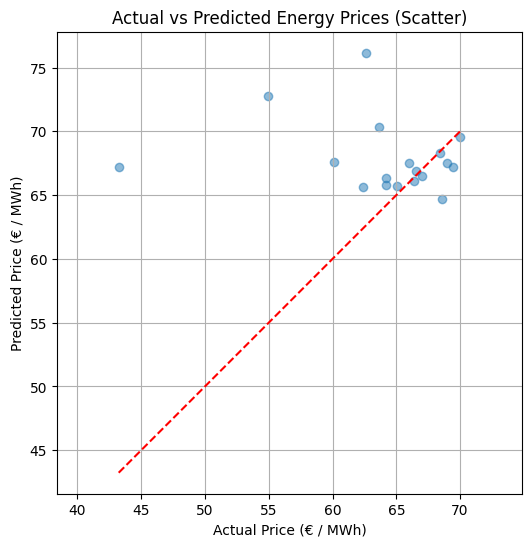

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€ / MWh)")
plt.ylabel("Predicted Price (€ / MWh)")
plt.title("Actual vs Predicted Energy Prices (Scatter)")
plt.grid(True)
plt.axis('equal')
plt.show()

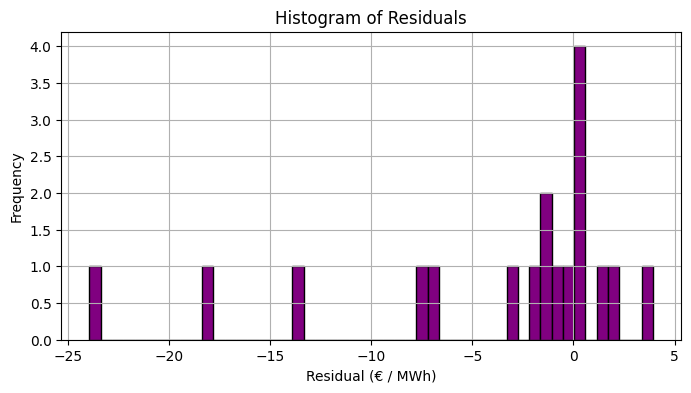

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(y_test - y_test_pred, bins=50, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual (€ / MWh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
coefficients = pd.Series(model.coef_, index=X_train_fit.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.tight_layout()
plt.show()

NameError: name 'model' is not defined